In [28]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
repayment= pd.read_csv('Repayment.csv').convert_dtypes()
spend = pd.read_csv('spend.csv').convert_dtypes()
cust_acq = pd.read_csv('Customer Acqusition.csv').convert_dtypes()
credit= pd.read_excel('Credit Card Data.xlsx').convert_dtypes()
spend['Month']=pd.to_datetime(spend['Month'])
spend['Amount']=spend['Amount'].astype('float')
repayment.dropna(subset=['Customer'],inplace=True)
repayment['Month']=pd.to_datetime(repayment['Month'])
repayment['Amount']=repayment['Amount'].astype('float')
cust_spend= spend.merge(cust_acq,on='Customer',how='left')
cust_repayment= repayment.merge(cust_acq, on= 'Customer', how='left')

In [3]:
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002,C22,Self Employed


In [4]:
credit

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.141919
1,2,A1,2004-01-03,131778.688758
2,3,A1,2004-01-15,485981.516736
3,4,A1,2004-01-25,452865.826385
4,5,A1,2005-01-17,154684.838196
...,...,...,...,...
1495,1496,A67,2005-05-09,461916.04796
1496,1497,A68,2006-05-10,269635.645462
1497,1498,A69,2006-07-11,181524.046445
1498,1499,A70,2005-08-12,308330.678493


In [5]:
# 1.a)
cust_acq['Age'] = np.where(cust_acq.Age<18,cust_acq.Age.mean(),cust_acq.Age)

In [6]:
#1.b)
merged= spend.merge(cust_acq,how='left',on='Customer')
spend['Amount']= np.where(merged.Amount>merged.Limit,merged.Amount/2,merged.Amount)

In [7]:
#1.c)
repayment.dropna(subset=['Customer'],inplace=True)
merged1 =repayment.merge(cust_acq,how='left',on='Customer')
repayment['Amount']=np.where(merged1.Amount>merged1.Limit,merged1.Limit,merged1.Amount)

In [33]:
#2.a)
print('No. of customer=',cust_acq['Customer'].count())


No. of customer= 100


In [34]:
#2.b)
print('No.of categories=',cust_acq['Segment'].drop_duplicates().count())

No.of categories= 5


In [9]:
#2.c)
spend.groupby(spend.Month.dt.month).mean()['Amount']

Month
1     194710.418438
2     186455.995840
3     181677.998983
4     178603.764100
5     189569.413548
6     206504.822411
7     209148.671548
8     196979.307619
9     174536.387619
10    169077.894286
11    192591.394405
12    156522.573571
Name: Amount, dtype: float64

In [25]:
#2.d)
print(repayment.groupby(by=repayment.Month.dt.month).mean()['Amount'])

Month
1     245121.019624
2     248756.162368
3     241654.966393
4     259649.413200
5     257669.622782
6     220647.477083
7     253512.325102
8     254564.734898
9     226865.354750
10    240307.718333
11    229867.344524
12    286557.952500
Name: Amount, dtype: float64


In [ ]:
#2.e)
profit=spend.groupby(spend.Month.dt.month).sum()['Amount']-repayment.groupby(repayment.Month.dt.month).sum()['Amount']
profit[profit>0]*2.9/100

Month
1     325599.54015
3      114916.8036
6      84777.30225
9       4028.71712
10      7612.04818
11     46850.32099
Name: Amount, dtype: Float64

In [ ]:
#2.f)
(spend.groupby('Type').sum()['Amount'].sort_values(ascending=False))[0:5]

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

In [ ]:
#2.g)
(cust_spend).groupby('City').sum()['Amount'].sort_values(ascending=False).index[0]

'COCHIN'

In [ ]:
#2.h)
cust_acq['age_group']=np.where(cust_acq.Age<25,'youth',np.where(cust_acq.Age<60,'adult','senior'))
spend.merge(cust_acq,on='Customer',how='left').groupby('age_group')['Amount'].sum().sort_values(ascending=False).index[0]

'adult'

In [ ]:
#2.i)
pd.DataFrame(cust_repayment.groupby('Customer')['Amount'].sum().sort_values(ascending=False)).iloc[0:10,0]


Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

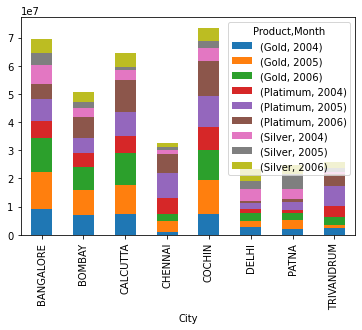

In [29]:
#3)
pd.pivot_table(data=cust_spend,values='Amount',columns=['Product',cust_spend.Month.dt.year],index='City',aggfunc='sum').plot(kind='bar',stacked="True")
plt.show()

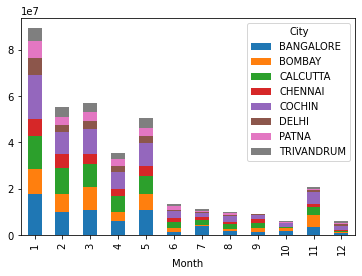

In [30]:
#4.a)
pd.pivot_table(cust_spend,index=cust_spend.Month.dt.month,columns='City',values="Amount",aggfunc='sum').plot(kind='bar',stacked='True')
plt.show()

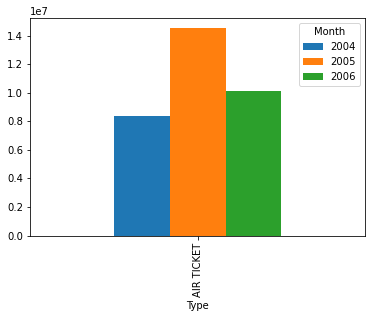

In [31]:
#4.b)
pd.pivot_table(data=spend[spend['Type']=='AIR TICKET'],values='Amount',columns=spend.Month.dt.year,index='Type',aggfunc='sum').plot(kind='bar')
plt.show()

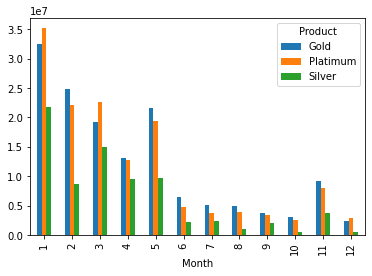

In [32]:
#4.c)
pd.pivot_table(data=cust_spend,index=cust_spend.Month.dt.month, columns='Product',values='Amount',aggfunc='sum').plot(kind='bar')
plt.show()

In [ ]:
#5

product= input('Enter the product (Gold/Silver/Platinum)')
period = input('Enter the time period (monthly/yearly) ')
def check(data,prod,time):
    if time=='Yearly':
        return pd.pivot_table(data=data[data['Product']==prod],index=['Customer','City',data.Month.dt.year],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).iloc[0:10]
    elif time=='Monthly':
        return pd.pivot_table(data=data[data['Product']==prod],index=['Customer','City',data.Month.dt.month],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).iloc[0:10]

print(check(cust_repayment,product,period))

                              Amount
Customer City      Month            
A22      BOMBAY    1      3832158.23
A25      COCHIN    5      1981504.65
A8       PATNA     1      1966760.70
A18      BANGALORE 3      1950621.08
A46      PATNA     1      1903154.83
                   5      1838527.38
A6       DELHI     1      1814302.75
A46      PATNA     2      1736567.47
A23      BANGALORE 5      1689987.35
                   1      1597308.11
